In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
from matplotlib import style
import  seaborn as sns

plt.style.use('ggplot')

In [5]:
data = pd.concat(pd.read_excel('histo_cotation_2017_2018_2019.xlsx', sheet_name=None), ignore_index=True)
data

,SEANCE,GROUPE,CODE,VALEUR,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX,IND_RES,DIVIDENDE
0,----------,-------,------,------------------,-----------,-----------,-----------,-----------,------------------,---------------,-----------------,-------,NaN
1,2017-02-01 00:00:00,11,100010,MONOPRIX,9.8,9.8,9.55,9.8,3055,9,29189,NaN,NaN
2,2017-02-01 00:00:00,11,110025,SFBT,19.2,19.4,19,19.5,3821,31,72703.6,NaN,NaN
3,2017-02-01 00:00:00,11,120040,TUNISAIR,0.6,0.6,0.59,0.6,4651,8,2790.4,NaN,NaN
4,2017-02-01 00:00:00,11,160015,ATTIJARI BANK,27.39,27.1,27.02,27.39,1726,18,46802.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285867,2019-12-31 00:00:00,52,750001,AETECH,0,0.33,0,0,0,0,NaN,NaN,NaN
285868,2019-12-31 00:00:00,52,766001,MAGHREB INTERN,0.22,0.22,0.22,0.22,525,2,115.5,NaN,NaN
285869,2019-12-31 00:00:00,52,773001,SANIMED,0,1.85,0,0,0,0,NaN,NaN,NaN
285870,2019-12-31 00:00:00,52,760001,SOTEMAIL,2.9,2.9,2.9,2.9,1000,3,2900,NaN,NaN


In [6]:
adwiya_data = data[data['VALEUR'] == 'ADWYA']
adwiya_data = adwiya_data.assign(CLOTURE=pd.to_numeric(adwiya_data['CLOTURE']))
rendement = np.zeros_like(adwiya_data['CLOTURE'])
adwiya_data = adwiya_data.assign(RENDEMENT=rendement)
index_nb_trans_zero = adwiya_data.index[adwiya_data['NB_TRANSACTION'] == 0].tolist()
adwiya_data = adwiya_data.drop(index_nb_trans_zero)
adwiya_data.loc[adwiya_data['NB_TRANSACTION'] == 0,]
adwiya_data['SEANCE'] = adwiya_data['SEANCE'].astype(str)
adwiya_data

,SEANCE,GROUPE,CODE,VALEUR,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX,IND_RES,DIVIDENDE,RENDEMENT
34,2017-02-01 00:00:00,11,725001,ADWYA,6.37,6.27,6.27,6.37,148,3,941.26,NaN,NaN,0.0
546,2017-03-01 00:00:00,11,725001,ADWYA,6.28,6.28,6.28,6.28,534,5,3353.52,NaN,NaN,0.0
1058,2017-04-01 00:00:00,11,725001,ADWYA,6.38,6.30,6.3,6.38,3428,14,21732.2,NaN,NaN,0.0
1570,2017-05-01 00:00:00,11,725001,ADWYA,6.3,6.30,6.22,6.3,3724,22,23373.9,NaN,NaN,0.0
2082,2017-06-01 00:00:00,11,725001,ADWYA,6.29,6.30,6.23,6.35,1813,11,11445.7,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284302,2019-12-25 00:00:00,11,725001,ADWYA,2.6,2.55,2.53,2.6,42526,88,108731,NaN,NaN,0.0
284616,2019-12-26 00:00:00,11,725001,ADWYA,2.59,2.55,2.52,2.59,1985,14,5003.43,NaN,NaN,0.0
284930,2019-12-27 00:00:00,11,725001,ADWYA,2.62,2.55,2.55,2.69,223,12,576.66,NaN,NaN,0.0
285244,2019-12-30 00:00:00,11,725001,ADWYA,2.62,2.55,2.55,2.65,1527,16,3935.55,NaN,NaN,0.0


In [7]:
adwiya_data['DIVIDENDE'] = 0.0
adwiya_data.loc[adwiya_data['SEANCE'] == '31/07/18','DIVIDENDE']=0.150
adwiya_data.loc[adwiya_data['SEANCE'] == '07/08/2019','DIVIDENDE']=0.100
adwiya_data.loc[adwiya_data['DIVIDENDE']>0]

,SEANCE,GROUPE,CODE,VALEUR,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX,IND_RES,DIVIDENDE,RENDEMENT
176710,31/07/18,11,725001,ADWYA,5.66,5.8,5.66,5.82,1349,8,7804.52,NaN,0.15,0.0


In [8]:
rendemnt_cal = np.log((adwiya_data['CLOTURE']/adwiya_data['CLOTURE'].shift(1)))
adwiya_data['RENDEMENT'] = rendemnt_cal
rt = np.nanmean(adwiya_data['RENDEMENT'])
sum_r_rbarre = np.sum((adwiya_data['RENDEMENT'] - rt)**2)
sigma_squared = 250/(len(adwiya_data)-1) * sum_r_rbarre
sigma = np.sqrt(sigma_squared)
mu = 0.5 * sigma_squared + rt *250



In [9]:
var = {'rt':rt , 'sigma_squared':sigma_squared , 'sigma':sigma , 'mu':mu}
for var , value in var.items():
    print (var + "=" + str(value))

rt=-0.001224406874816235
sigma_squared=0.046349702323740964
sigma=0.21528981007874237
mu=-0.2829268675421883


In [10]:
adwiya_data.RENDEMENT=adwiya_data.RENDEMENT.replace([np.inf,np.inf],0)
adwiya_data.RENDEMENT

34             NaN
546       0.001594
1058      0.003180
1570      0.000000
2082      0.000000
            ...   
284302   -0.019418
284616    0.000000
284930    0.000000
285244    0.000000
285558   -0.003929
Name: RENDEMENT, Length: 739, dtype: float64

In [11]:
adwiya_data.RENDEMENT=adwiya_data.RENDEMENT.replace(np.nan,0)
adwiya_data.RENDEMENT

34        0.000000
546       0.001594
1058      0.003180
1570      0.000000
2082      0.000000
            ...   
284302   -0.019418
284616    0.000000
284930    0.000000
285244    0.000000
285558   -0.003929
Name: RENDEMENT, Length: 739, dtype: float64

In [12]:
stats.shapiro(adwiya_data.RENDEMENT)

(0.9639519453048706, 1.6258334739269187e-12)

In [13]:
stats.jarque_bera(adwiya_data.RENDEMENT)

(47.32202267608028, 5.298506078332821e-11)

In [14]:
rendemnt_cal = np.log((adwiya_data['CLOTURE']/adwiya_data['CLOTURE'].shift(1)))
rendemnt_cal

34             NaN
546       0.001594
1058      0.003180
1570      0.000000
2082      0.000000
            ...   
284302   -0.019418
284616    0.000000
284930    0.000000
285244    0.000000
285558   -0.003929
Name: CLOTURE, Length: 739, dtype: float64

In [15]:
rt = np.nanmean(adwiya_data['RENDEMENT'])
rt

-0.0012227500319545081

In [16]:
sum_r_rbarre = np.sum((adwiya_data['RENDEMENT'] - rt)**2)
sigma_squared = 250/(len(adwiya_data)-1) * sum_r_rbarre
sigma_squared 

0.046350209486188565

In [17]:
adwiya_data

,SEANCE,GROUPE,CODE,VALEUR,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX,IND_RES,DIVIDENDE,RENDEMENT
34,2017-02-01 00:00:00,11,725001,ADWYA,6.37,6.27,6.27,6.37,148,3,941.26,NaN,0.0,0.000000
546,2017-03-01 00:00:00,11,725001,ADWYA,6.28,6.28,6.28,6.28,534,5,3353.52,NaN,0.0,0.001594
1058,2017-04-01 00:00:00,11,725001,ADWYA,6.38,6.30,6.3,6.38,3428,14,21732.2,NaN,0.0,0.003180
1570,2017-05-01 00:00:00,11,725001,ADWYA,6.3,6.30,6.22,6.3,3724,22,23373.9,NaN,0.0,0.000000
2082,2017-06-01 00:00:00,11,725001,ADWYA,6.29,6.30,6.23,6.35,1813,11,11445.7,NaN,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284302,2019-12-25 00:00:00,11,725001,ADWYA,2.6,2.55,2.53,2.6,42526,88,108731,NaN,0.0,-0.019418
284616,2019-12-26 00:00:00,11,725001,ADWYA,2.59,2.55,2.52,2.59,1985,14,5003.43,NaN,0.0,0.000000
284930,2019-12-27 00:00:00,11,725001,ADWYA,2.62,2.55,2.55,2.69,223,12,576.66,NaN,0.0,0.000000
285244,2019-12-30 00:00:00,11,725001,ADWYA,2.62,2.55,2.55,2.65,1527,16,3935.55,NaN,0.0,0.000000


In [18]:
sigma_squared = 250/(len(adwiya_data)-1) * sum_r_rbarre
sigma = np.sqrt(sigma_squared)
sigma

0.21529098793537216

In [19]:
mu = 0.5 * sigma_squared + rt *250
mu

-0.28251240324553273

In [20]:
acorr_ljungbox(adwiya_data['RENDEMENT'].replace(np.nan, 0.0 ) , lags= 5)
acorr_ljungbox(adwiya_data['RENDEMENT'].replace(np.nan, 0.0 ) , lags= 10)

C:\Users\ASMA\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([11.78883505, 11.80378703, 12.11405827, 12.12894402, 14.15971112,
        14.17912854, 16.05002582, 16.13362354, 16.1660383 , 17.89265654]),
 array([0.00059587, 0.00273426, 0.00700248, 0.01641773, 0.01462611,
        0.02769796, 0.02466323, 0.04050699, 0.0634942 , 0.0568016 ]))

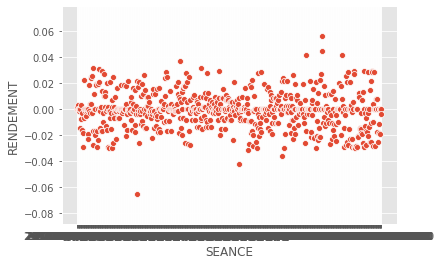

In [21]:
sns.scatterplot(x = 'SEANCE' , y= 'RENDEMENT' , data=adwiya_data )
plt.show()

In [22]:
stats.shapiro(adwiya_data['RENDEMENT'].replace(np.nan, 0.0))

(0.9639519453048706, 1.6258334739269187e-12)

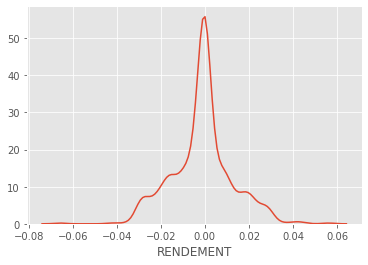

In [23]:
sns.distplot(adwiya_data['RENDEMENT'].replace(np.nan, 0.0) , hist = False)

In [24]:
JB=(adwiya_data.shape[0]/6)*(np.square(stats.skew(adwiya_data.RENDEMENT))+(np.square((stats.kurtosis(adwiya_data.RENDEMENT))-3)/4))
JB

96.34591436457647

In [36]:
s0 = adwiya_data.iloc[-1]['CLOTURE']
k = 6
d1 = (np.log(s0/k) + (0.07 + 0.5 * sigma_squared)) * 1/sigma
d2 = d1 - sigma
prix_achat = s0*stats.norm.cdf(d1) - k*(np.exp(-0.07))*stats.norm.cdf(d2)
prix_achat


2.393729109303333e-05

In [33]:
s0 = adwiya_data.iloc[-1]['CLOTURE']


2.54

In [81]:
normal = np.random.normal(size=100000)
normal
s = s0 * np.exp((0.07 - sigma_squared/2) + sigma * normal)
xx = np.maximum((s - k), 0)
prix_achat2 = np.mean(xx) * np.exp(-0.07)
prix_achat2


3.7067866017107096e-06